#🛫 Problem Statement –  Airline! ✈️

Imagine you're managing flight operations for a major airline — say, from Bangalore to Delhi, or routes like Hyderabad to Mumbai or Chennai to Kolkata.

Now think about this:

✈️ If too many flights are scheduled but fewer passengers turn up, many seats go empty — leading to huge losses.

👥 On the other hand, if too few flights are scheduled and more passengers show up, it leads to overbooking, delays, and unhappy customers — and the airline loses profit.

So how can airlines plan better?
The key is to forecast how many passengers are likely to travel on any given day.

That’s exactly what we’re doing today with Time Series Forecasting using the Air Passengers dataset.

We’ll explore:

How the number of passengers changes over time

What patterns or trends exist

And how to predict future passenger demand to help airlines plan flights efficiently

This is a real-world use case of data science — and you’re going to solve it today! 🚀



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
plt.style.use('dark_background')

In [27]:
data = pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [29]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace = True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [31]:
data.isnull().sum()

#Passengers    0
dtype: int64

<Axes: xlabel='Month'>

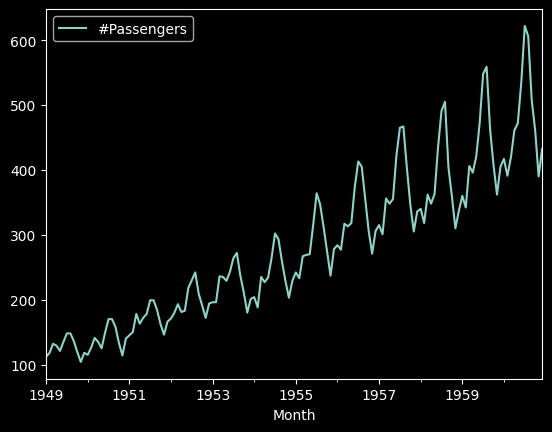

In [32]:
data.plot()

In [33]:
#sesonal decompose ---take your time series data as input and decompose into 3 main components
# - Trend -- the overall direction or pattern in the data over a long period of time
# - sesonality - the repeating short term cycle in the data(monthly/quarterly)
# - residual/noise - unpredicatble change

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(640x480)


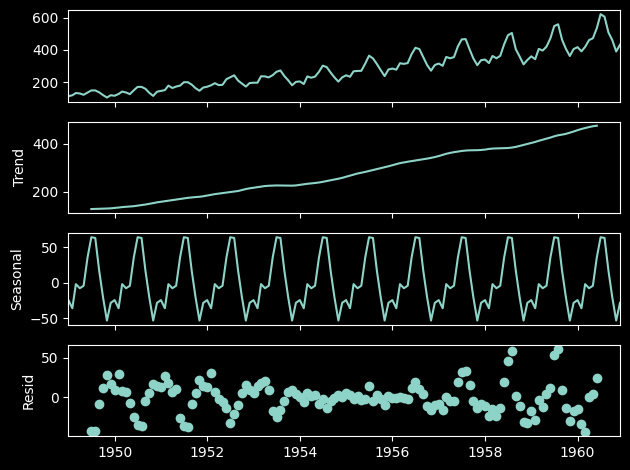

In [35]:
decomposed = seasonal_decompose(data)
print(decomposed.plot())

In [36]:
#check whether data is stationarity or not?
#adf - augumented dickey fuller test

#null hypo - data is not stationa
#alt hypo- data is station

#if p-val less than 0.05 --- data is statioanry -- acc the null
#if p-vall >0.05 -- data is not stationa --- acc the alt

In [38]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(data)

In [39]:
pval = test_result[1]
pval

np.float64(0.991880243437641)

In [41]:
if pval < 0.05:
  print("reject the null hypo ---- data is stationary")
else:
  print("------data is not stationary---")

------data is not stationary---


In [42]:
#stationary --- the data which has constant mean and variance
#As our data ---- we need to convert our data into stationary
#for that we need tro stabilize the mean and variance over time

#remove sesonality
#removing trend

<Axes: xlabel='Month'>

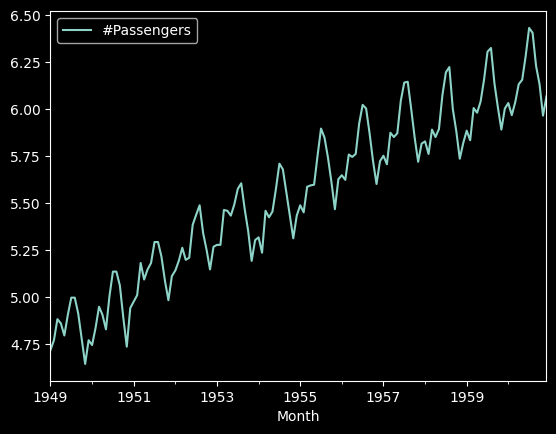

In [43]:
# Logarithmic Transformation
first_log = np.log(data)
first_log = first_log.dropna()
first_log.plot()

In [44]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [45]:
#rolling mean(mean_log) - this computes the moving average of the timeseries over a specific window
#it helps us to smooth out short term fluctuations and highligh the lonmg term trends
#rolling std(std_log)--- moving std -- how much variation exist around the rolling mean

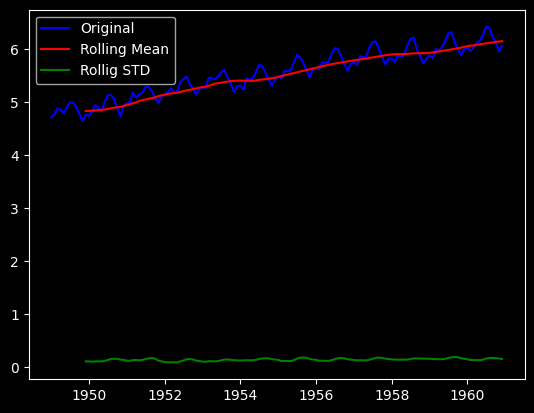

In [47]:
mean_log = first_log.rolling(window = 12).mean()
std_log = first_log.rolling(window = 12).std()

plt.plot(first_log, color = 'Blue', label = 'Original')
plt.plot(mean_log, color = 'Red', label = 'Rolling Mean')
plt.plot(std_log, color = 'Green', label = 'Rollig STD')
plt.legend(loc = 'best')

In [48]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [49]:
mean_log.isnull().sum().sum()

np.int64(11)

In [50]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head(20)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


<Axes: xlabel='Month'>

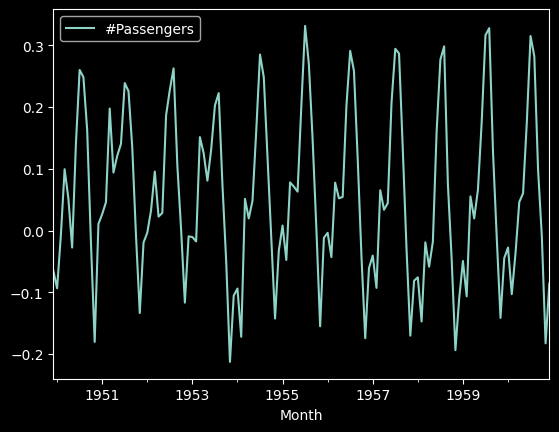

In [51]:
new_data.plot()

In [52]:
#again checking whether the data is stationary or not
test_result1 = adfuller(new_data)
pval1 = test_result1[1]
pval1

np.float64(0.022234630001243157)

- index 0 -- adf_statistic
- index 1 -- p_val
- index 2 --  used_lags
- index 3 -- nobs
- index 4 -- crtical values
- index 5 -- icbest

In [53]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [54]:
train = new_data[:120]['#Passengers']
test = new_data[120:]['#Passengers']

In [55]:
train

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1959-07-01    0.316430
1959-08-01    0.327838
1959-09-01    0.128057
1959-10-01   -0.011315
1959-11-01   -0.141406
Name: #Passengers, Length: 120, dtype: float64

In [56]:
test

Month
1959-12-01   -0.044481
1960-01-01   -0.027530
1960-02-01   -0.103067
1960-03-01   -0.036530
1960-04-01    0.046332
1960-05-01    0.060186
1960-06-01    0.175033
1960-07-01    0.315151
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, dtype: float64

In [57]:
# Implement ARIMA

# Autoregressive integrated moving average
# P, D, Q

# p - order of lag
# d - degree of differencing
# q - order of moving average

In [60]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import *

In [62]:
import itertools
p = range(0,7)
d = range(1,2)
q = range(0,7)

pdq = list(itertools.product(p, d, q))
rmse = []
order1 = []

for i in pdq:
    model = ARIMA(train, order = i)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train), end = len(train) + len(test) - 1)
    error = np.sqrt(mean_squared_error(test, pred))
    order1.append(i)
    rmse.append(error)

results = pd.DataFrame(index = order1, data = rmse, columns = ['RMSE'])

C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [63]:
results.sort_values(by = 'RMSE', ascending = True)

,RMSE
"(6, 1, 6)",0.069945
"(4, 1, 6)",0.071683
"(5, 1, 6)",0.076618
"(6, 1, 1)",0.098734
"(3, 1, 3)",0.114436
"(4, 1, 5)",0.114522
"(6, 1, 3)",0.125230
"(6, 1, 2)",0.127807
"(6, 1, 5)",0.129165
"(2, 1, 2)",0.135844


In [64]:
A_model = ARIMA(train, order = (6,1,6))

C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [65]:
A_model = A_model.fit()

C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
new_data['Arima_Prediction']  = A_model.predict(start = len(train), end = len(train) + len(test) - 1)

<Axes: xlabel='Month'>

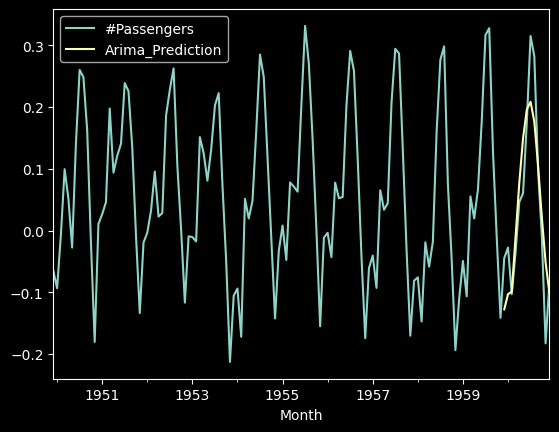

In [67]:
new_data[['#Passengers', 'Arima_Prediction']].plot()

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

S_model = SARIMAX(train, order = (6,1,6), seasonal_order = (6,1,6,12))
S_model = S_model.fit()

C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\karan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
new_data['Sarimax_Prediction'] = S_model.predict(start = len(train), end = len(train) + len(test) - 1)

<Axes: xlabel='Month'>

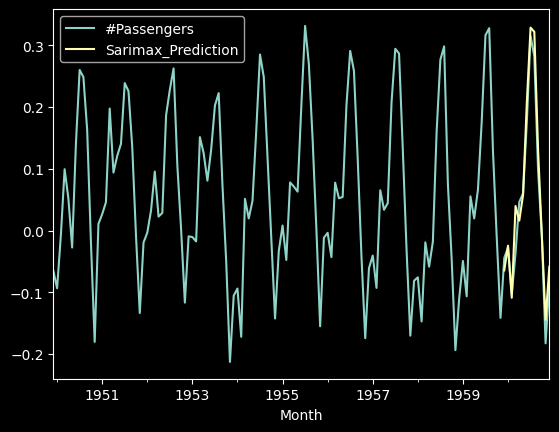

In [75]:
new_data[['#Passengers', 'Sarimax_Prediction']].plot()

<Axes: xlabel='Month'>

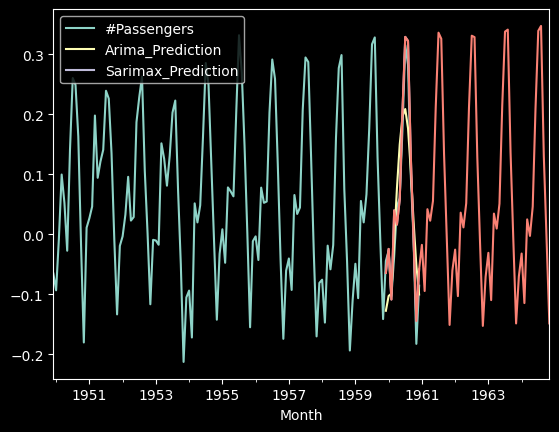

In [76]:
future = S_model.forecast(steps = 60) # lets say for 5 years 5*12 = 60 months
new_data.plot()
future.plot()

In [77]:
#loading your data
#make sure you are working oin one col - replaces the index col
#sesonal decompose - tocheck trand,sesonality,residual
#check whter data is stationary - adf test
# - log transformation - rolling mean,std
#again check whter data is stationary - adf test
#data is ready
#model building
#train test split
#optimal p,d,q - itertools - less rmse
#less error combo
#arima model - if satisfie sgood
#else we have yo use sarimax